# **Energy consumption prediction for Steel Industry**

### **Description:**
Predicting electricity consumption of DAEWOO Steel Co. Ltd in Gwangyang, South Korea.This dataset contains 11 attributes and 35040 values.


### **Attribute Information:**
* 1.Data Variables 
* 2.Industry Energy Consumption 
* 3.Lagging Current reactive power 
* 4.Leading Current reactive power 
* 5.tCO2(CO2) 
* 6.Lagging Current power factor 
* 7.Leading Current Power factor
* 8.Number of Seconds from midnight 
* 9.Week status Categorical (Weekend (0) or a Weekday(1))
* 10.Day of week
* 11.Load Type Categorical -Light Load, Medium Load, Maximum Load


## 1. Retrieving Data

In [1]:
#Importing dependancies for data processing 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Steel_industry_data.csv to Steel_industry_data.csv


In [3]:
# Loading dataset
data = pd.read_csv('Steel_industry_data.csv')

## 2. Exploratory Data Analysis

In [4]:
#Analysing for no.of values
data.shape

(35040, 11)

In [5]:
#Inspecting the structure and contents of Dataframe
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
#Inspecting the structure and contents of Dataframe
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
#Displaying the number of null or missing values in Dataframe
data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [8]:
#Assessing  number of unique values in each column of a DataFrame
data.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [9]:
#Calculating the correlation coefficients between all pairs of numeric columns in a DataFrame for identifying patterns and relationships in the data
data.corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


In [10]:
#Importing dependancies for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('darkgrid')

#### EDA Chart 1: Vizualization of frequency of usage of different load types

The sns.countplot function in Seaborn is used to visualize the frequency of unique values in a categorical column and pie plot with percentage labels is also shown

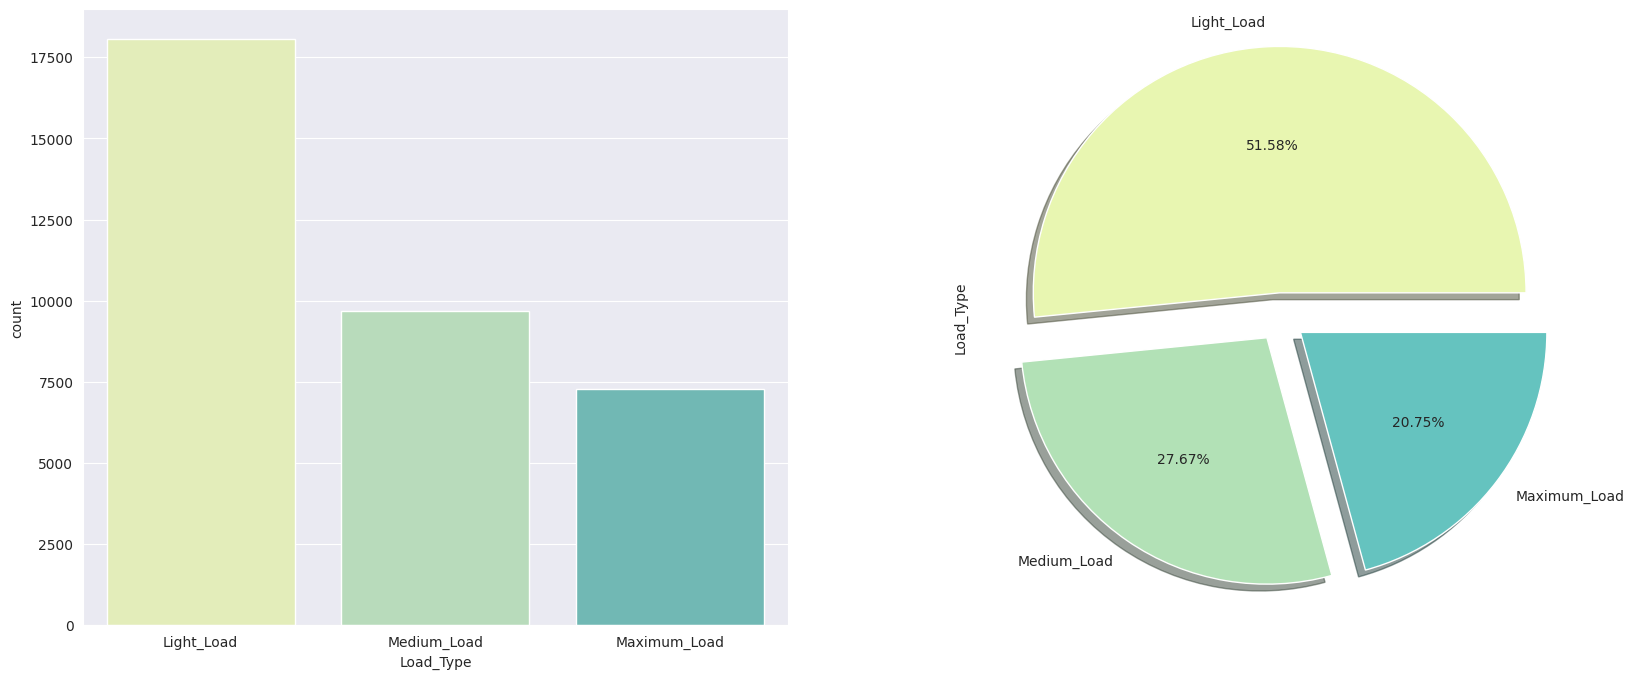

In [11]:
# Using seaborn library to assign 'Yellow-Green-Blue' palette to different load types
sns.set_palette('YlGnBu')

# Defining figure size using Matplotlib
plt.figure(figsize=(20,8))


# Subplot 1: frequency distribution of Load type in form of bar plot 
axs_bar = plt.subplot(1,2,1)
axs_bar = sns.countplot(x = 'Load_Type', data = data)


# Subplot 2: frequency distribution of Load type in form of pie chart
axs_pie =plt.subplot(1,2,2)
axs_pie=data['Load_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);


###### Conclusion: 
The vizualization shows that Light_Load has highest frequency (51.58%) among different types of load, followed by Medium_Load (27.67%) and Maximum_Load (20.75%) has lowest frequency.

#### EDA Chart 2: Vizualization of frequency of usage of different load types on different days of week

Citation: GeeksforGeeks. “Exploratory Data Analysis in Python.” GeeksforGeeks, 26 Apr. 2022, www.geeksforgeeks.org/exploratory-data-analysis-in-python.

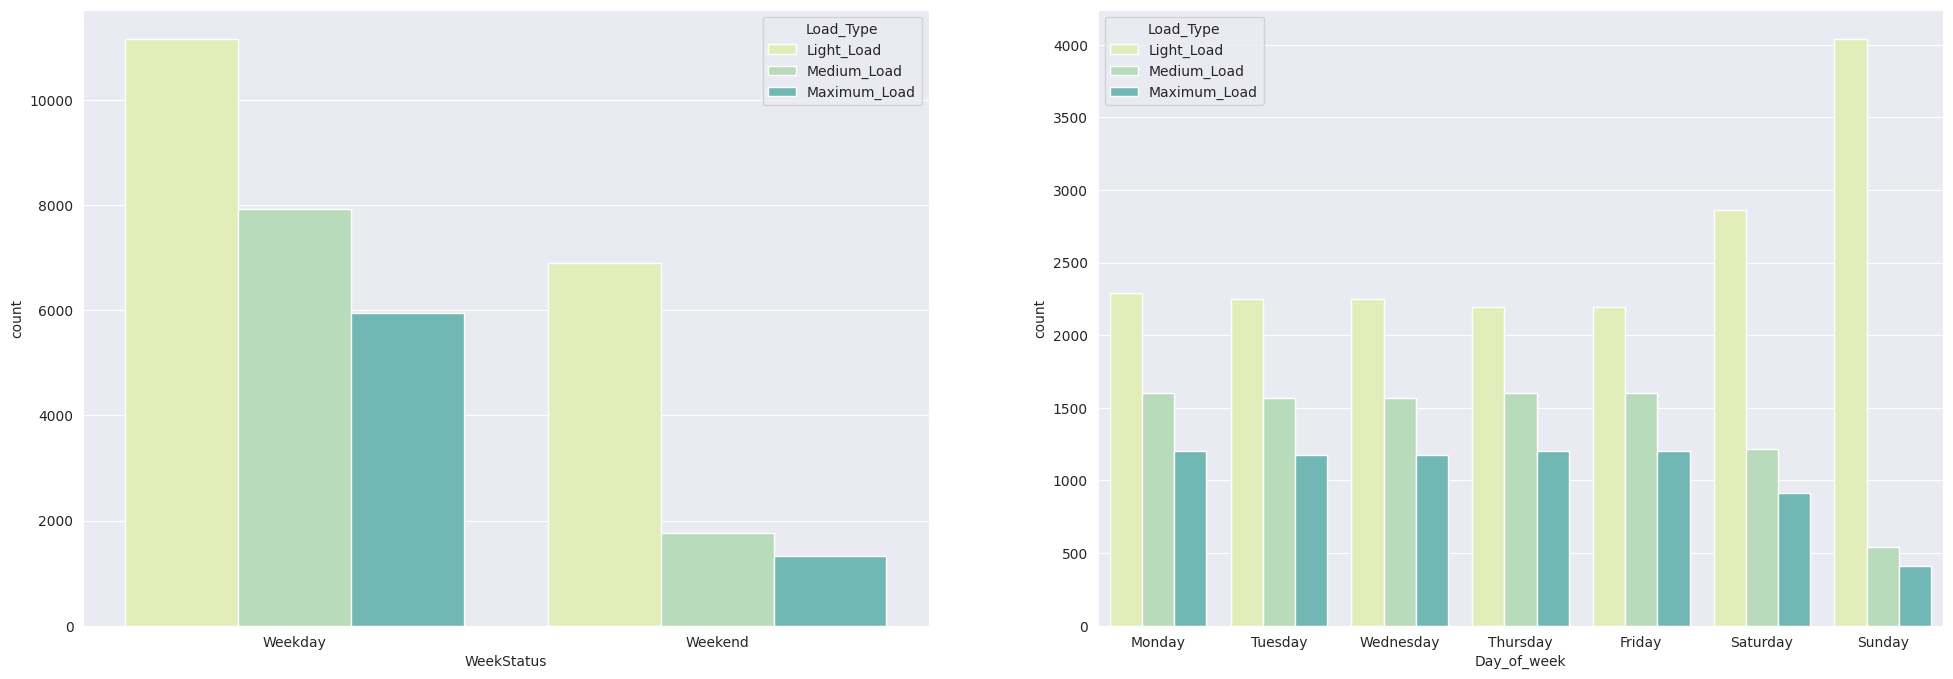

In [12]:
# We will continue using same palette of 'YlGnBu' for different load types to maintain symmetry

# Defining figure size using Matplotlib
plt.figure(figsize=(24,8))

# Subplot 1: frequency distribution of variation in load usage on week days and weekends using bar plot
plt.subplot(1,2,1)
sns.countplot(data=data, x="WeekStatus", hue="Load_Type")

# Subplot 2: frequency distribution of variation in load usage on different days using bar plot
plt.subplot(1,2,2)
sns.countplot(data=data, x="Day_of_week", hue="Load_Type")

plt.show()

###### Conclusion: 
* The first plot shows that weekdays have higher freqency than weekends.
* The second plot shows that: 
     * Light_Load frequency is high on weekends (highest on Sundays) and constant for weekdays
     * Medium_Load frequency and Maximum_Load frequency are low on weekends (lowest on Sundays) and constant for weekdays
* Both the plots show that for any given time or day of the week, Light_Load has highest frequency, followed by Medium_Load and Maximum_Load has lowest freqency  

#### EDA Chart 3: Correlation Heat Map

<Axes: >

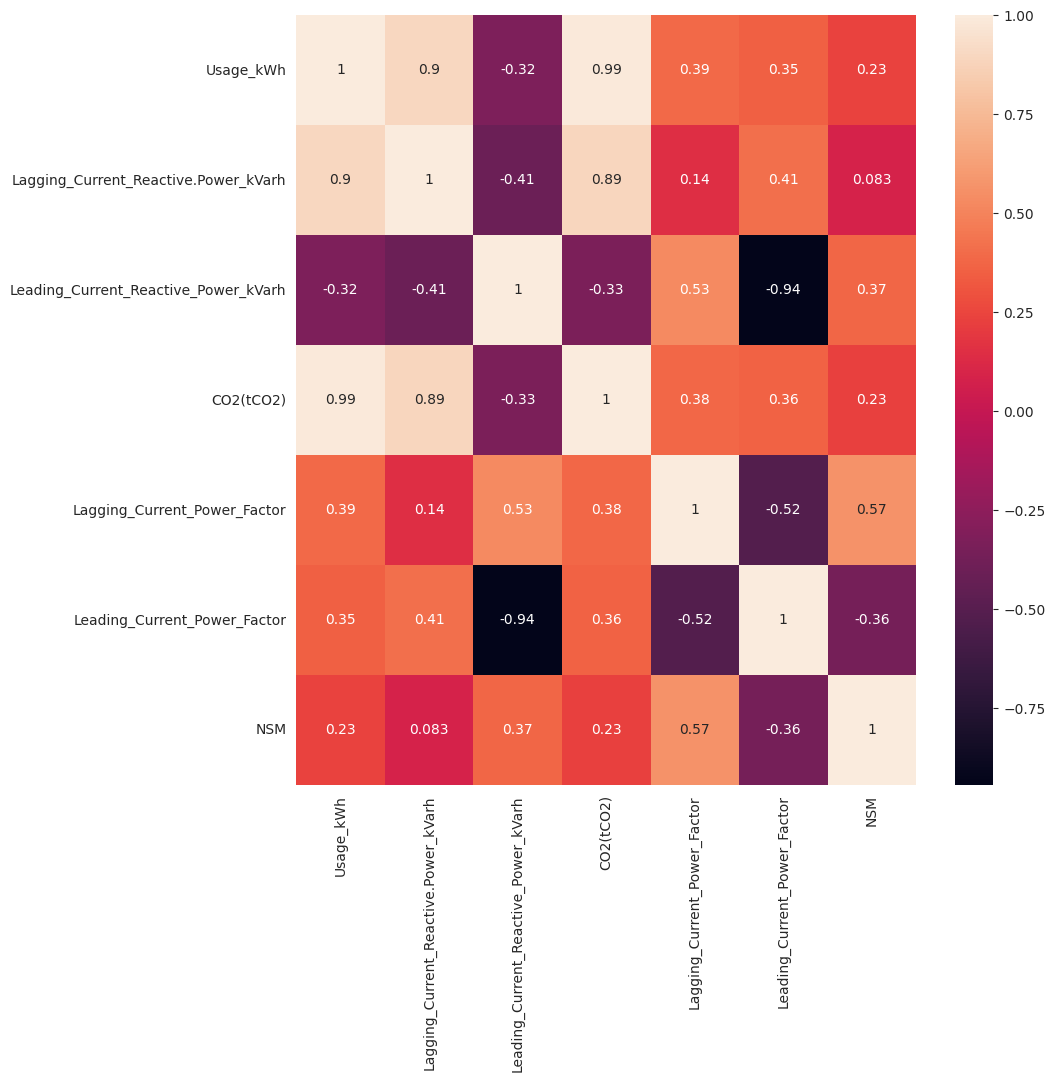

In [13]:
#Visualizing corrrealtion 
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

###### Conclusion: 
From the correlation graph, it can be observed that lagging current reactive power is directly proportional to usage, leading to greater energy consumption. This usage is also highly correlated with tCO2, resulting in increased emission of CO2 that is detrimental to the environment. Receiving more power from the source, lagging reactive power has a high correlation with tCO2, thus causing a rise in CO2 emission.

#### EDA Chart 4: Box Plots for numerical variables


Box Plots



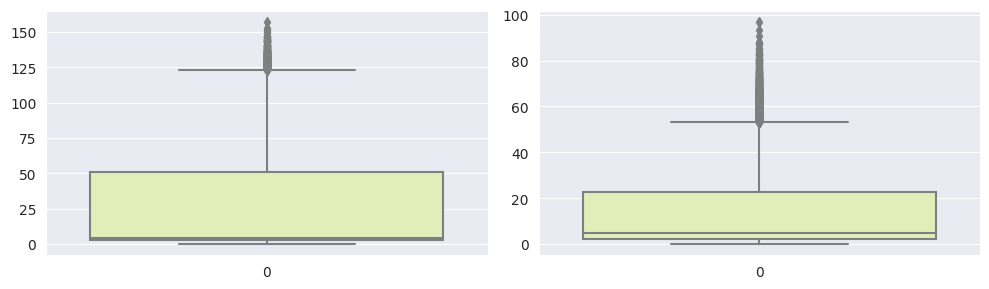

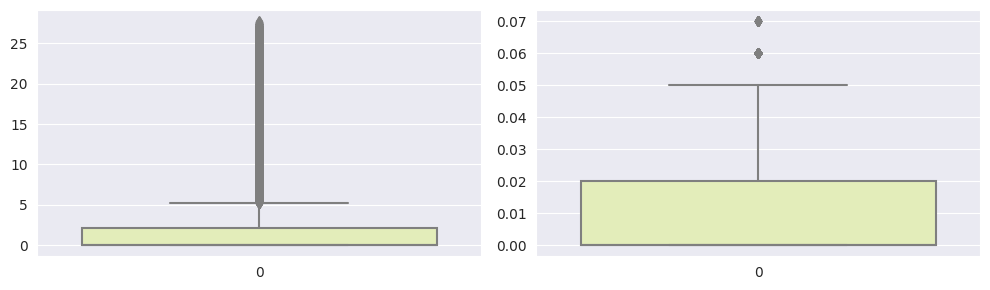

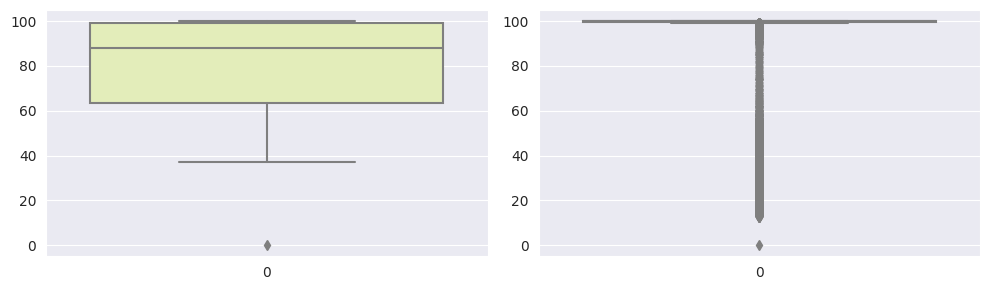

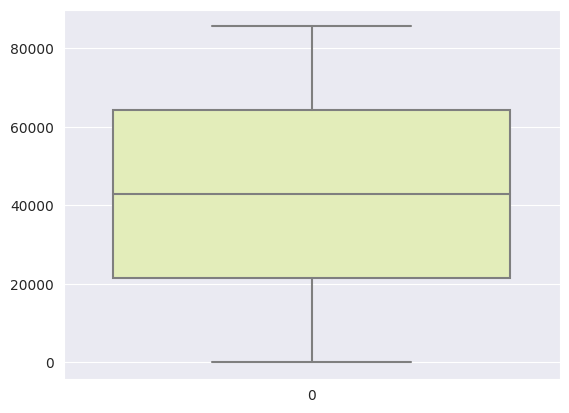

In [14]:
# Creating box plots to identify skewness in data and indentify outliers
def box_plots(dataframe):
    numeric_col = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_col]
    
    for i in range(0,len(numeric_col),2):
        if len(numeric_col) > i+1:
            plt.figure(figsize=(10,3))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_col[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_col[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_col[i]])
          
        
print('\nBox Plots\n')
box_plots(data)


###### Conclusion: 
In the above box plots, It can see that there are outlier in all features except NSM.

## 3. Data Pre Processing

### 3.1 Data Cleaning/Data Wrangling

<b> Examining the data to identify any missing values, outliers, or errors. </b>

In [15]:

print(data.isnull().sum()) # check for missing values
print(data.describe()) # summary statistics

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64
          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                  

### 3.2 Data Imputation

Missing values are initially filled using a simple imputation method such as mean, median, or mode.As we already identified our dataset doesn't contain any null or missing values , we are performing data imputation while treating the outliers in our data

### 3.3 Outlier Detection and Management

##### 3.3.1 Outlier Detection

In [16]:
#Making a copy of the original dataframe before performing operations like feature engineering/data cleaning
new_data = data.copy()

In [17]:
#Checking the dimensions of the data before applying transformations or cleaning,and verifying that data has been loaded correctly
new_data.shape

(35040, 11)

In [18]:
#Selecting columns which is of numeric datatype for identifying outliers in the dataset
column = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']

Citation: Bonthu, Harika. “Detecting and Treating Outliers | Treating the Odd One Out!” Analytics Vidhya, 30 Nov. 2022, https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/. 

In [19]:
#Using IQR function for handling numeric data in dataframe in order to identify and remove outliers from dataset 
def out_null(column):
        IQR=column.quantile(0.75)-column.quantile(0.25)
        UL=column.quantile(0.75)+1.5*IQR
        LL=column.quantile(0.25)-1.5*IQR
        column.where(column.between(LL,UL),np.nan,inplace=True)

In [20]:
#Replacing any values in the column that are outside the upper and lower limits with NaN values, where the limits are calculated using IQR 
for i in column:
    out_null(new_data[i])

In [21]:
#Checking for any missing or NaN values in the new DataFrame for cleaning and preparing the data, as it removes any extreme values and identifies any missing data that might need to be imputed
new_data.isnull().sum()

date                                       0
Usage_kWh                                328
Lagging_Current_Reactive.Power_kVarh    1059
Leading_Current_Reactive_Power_kVarh    7759
CO2(tCO2)                                437
Lagging_Current_Power_Factor               1
Leading_Current_Power_Factor            8327
NSM                                        0
WeekStatus                                 0
Day_of_week                                0
Load_Type                                  0
dtype: int64

##### 3.1.1 Outlier Treatment

In [ ]:
#Using Multiple imputations by chained equations (MICE) imputation on a pandas DataFrame for handling missing data
!pip install impyute

from impyute.imputation.cs import mice

In [23]:
#Importing dependencies for performing imputation on missing data in a dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Initializing an IterativeImputer instance with several parameters and fits it to a subset of the new_data DataFrame to impute missing values in the specified columns using an iterative approach.

In [24]:
# Initializing an IterativeImputer instance
mice_imputer = IterativeImputer(max_iter=50, random_state=42, initial_strategy='median', imputation_order='random', skip_complete=True)
mice_imputer.fit(new_data[column])

IterativeImputer(imputation_order='random', initial_strategy='median',
                 max_iter=50, random_state=42, skip_complete=True)

In [25]:
# Imputing numerical columns with MICE imputer
new_data[column] = mice_imputer.transform(new_data[column])

Replaced the missing values in the subset with imputed values generated by the IterativeImputer instance.

In [26]:
# Displaying column names of copy of dataframe
new_data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [27]:
# Saving changes in original database
data = new_data

In [28]:
data.shape

(35040, 11)

In [29]:
# Checking null values to see whether original data is altered
data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

 After performing missing value imputation,the resulting DataFrame contains no missing values, making it suitable for further analysis and modeling.
 
Now Let's check the performance of imputer by checking number of outliers after imputation.

In [30]:
# Creating a new dataframe so that original dataframe is not altered
new_data_check = data.copy()

# Replacing any values in the column that are outside the upper and lower limits with NaN values, where the limits are calculated using IQR 
for i in column:
    out_null(new_data_check[i])

In [31]:
#Checking for any missing or NaN values in the new DataFrame for cleaning and preparing the data, as it removes any extreme values and identifies any missing data that might need to be imputed
new_data_check.isnull().sum()

date                                      0
Usage_kWh                                80
Lagging_Current_Reactive.Power_kVarh    350
Leading_Current_Reactive_Power_kVarh    821
CO2(tCO2)                               120
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor            935
NSM                                       0
WeekStatus                                0
Day_of_week                               0
Load_Type                                 0
dtype: int64

In each iteration, the imputer generates new imputed values based on the previously imputed values, and the process continues until convergence or until a maximum number of iterations is reached.
If the imputer is running multiple times on the same dataset, it may result in overfitting, where the imputer fits the imputed values too closely to the observed values, resulting in a loss of generalizability of the imputed values.
To prevent the overfitting, creation of bias in data and loss of data, we have done the imputer iteration only once.

In [32]:
# Checking number of null for each feature of the database
data.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

## 4. Data Preparation

In [33]:
#Splitting the dataset into 'X' which is a input feature except 'Usage' column and 'y' which is a target variable 'Usage" column
y = data['Usage_kWh']
X = data.drop(['Usage_kWh','date'], axis = 1)

### 4.1 Feature Engineering

Using Label Encoding in regression analysis is to enable the regression model to interpret and use categorical variables as input features. It is necessary to convert categorical variables to numeric variables because regression models require continuous numerical input features.

In [34]:
#Importing Labelencoder for interpreting categorical variables
from sklearn.preprocessing import LabelEncoder

Creating a new DataFrame that contains only the categorical variables, which makes it easier to preprocess these variables separately from the numerical variables inorder to encode them.

In [35]:
# Creating a new DataFrame that contains only the categorical variables
cat_variables = X[['WeekStatus','Day_of_week','Load_Type']]

In [36]:
# Initializing label encoder
le = LabelEncoder()

 The Label Encoder is performing this transformation, by assigning a unique integer to each category in the categorical variable 

In [37]:
for col in cat_variables:
    X[col] = le.fit_transform(X[col])

In [38]:
#Checking number of null values
X.isnull().sum()

Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

### 4.2 Feature Selection/ Extraction

In [39]:
# Importing module
from sklearn.feature_selection import SelectKBest, f_regression

Performing feature selection by selecting the k best features that have the strongest correlation with the target variable based on the f_regression scoring function.

In [40]:
#Selecting the top 5 features that have the highest correlation with the target variable 
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

In [41]:
#Identifying which features are the most important predictors for the target variable
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'WeekStatus', 'Load_Type'],
      dtype='object')


In [42]:
# Updating X
X = X[['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'WeekStatus', 'Load_Type']]

In [43]:
X.head()

,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,WeekStatus,Load_Type
0,2.95,0.0,73.21,0,0
1,4.46,0.0,66.77,0,0
2,3.28,0.0,70.28,0,0
3,3.56,0.0,68.09,0,0
4,4.50,0.0,64.72,0,0


### 4.3 Feature Scaling

StandardScaler technique is used to standardize the features of a dataset so that they are on the same scale and have similar ranges.This ensures that the new data is on the same scale as the training data and will produce accurate predictions.

In [44]:
# Importing modules for feature scaling and performing standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_scaled

array([[-0.63513495, -0.72029175, -0.3896136 , -0.63124277, -0.88740425],
       [-0.53234743, -0.72029175, -0.73006157, -0.63124277, -0.88740425],
       [-0.61267145, -0.72029175, -0.54450685, -0.63124277, -0.88740425],
       ...,
       [-0.62015928, -0.72029175, -0.20934535, -0.63124277, -0.88740425],
       [-0.62764711, -0.72029175, -0.1511943 , -0.63124277, -0.88740425],
       [-0.63036996, -0.72029175, -0.17762659, -0.63124277, -0.88740425]])

## 5. Sampling

#### Data Splitting

In [46]:
# Data splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## 6. Modelling

### 6.1 Linear Regression Model

### 6.1.2 Simple Linear Regression Model

In [47]:
# Importing modules for Linear Regression Modelling
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

##### Building and Training the Model

In [48]:
# Building and Training the Linear Regression Model
lnr = linear_model.LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred_train = lnr.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2score_train = r2_score(y_train, y_pred_train)
print(f"R2 score: {r2score_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"Mean squared error: {mse_train:.2f}")

R2 score: 0.98
MAE: 2.48
Mean squared error: 19.26


##### Evaluating the Model

In [50]:
# Model Evaluation
y_pred = lnr.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2score_test = r2_score(y_test, y_pred)
print(f"R2 score: {r2score_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"Mean squared error: {mse_test:.2f}")

R2 score: 0.98
MAE: 2.44
Mean squared error: 16.07


### 6.1.2 Hyper Parameter Optimization using Grid SearchCV

In [51]:
# Importing modules for Hyper Parameter Optimization using Grid SearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

##### Building and Training the Model

In [52]:
# Building and Training the Model
hyperparameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}
gridsearch = GridSearchCV(lnr, hyperparameters, cv=5)

In [53]:
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [54]:
msehyptrain = mean_squared_error(y_train, y_pred_train)
maehyptrain = mean_absolute_error(y_train, y_pred_train)
r2scorehyptrain = r2_score(y_train, y_pred_train)
print(f"R2 score: {r2scorehyptrain:.2f}")
print(f"MAE: {maehyptrain:.2f}")
print(f"Mean squared error: {msehyptrain:.2f}")

# best hyperparameters
print("Best hyperparameters: ", gridsearch.best_params_)

R2 score: 0.98
MAE: 2.48
Mean squared error: 19.26
Best hyperparameters:  {'copy_X': True, 'fit_intercept': True}


##### Evaluating the Model

In [55]:
# Model Evaluation
msehyptest = mean_squared_error(y_test, y_pred)
maehyptest = mean_absolute_error(y_test, y_pred)
r2scorehyptest = r2_score(y_test, y_pred)
print(f"R2 score: {r2scorehyptest:.2f}")
print(f"MAE: {maehyptest:.2f}")
print(f"Mean squared error: {msehyptest:.2f}")

# best hyperparameters
print("Best hyperparameters: ", gridsearch.best_params_)

R2 score: 0.98
MAE: 2.44
Mean squared error: 16.07
Best hyperparameters:  {'copy_X': True, 'fit_intercept': True}


### Summary

In [56]:
# Summary of Linear Regression Model in form of table
prediction_columns = ["MODEL TYPE", "DATASET TYPE", "R-2 SCORE", "MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR"]
df_pred = {"MODEL TYPE" : ["SIMPLE Linear Regression MODEL", "SIMPLE Linear Regression MODEL", "Linear Regression MODEL after HYPER PARAMETER OPTIMIZATION", "Linear Regression MODEL after HYPER PARAMETER OPTIMIZATION"],
           "DATASET TYPE" : ["Training Dataset", "Test Dataset", "Training Dataset", "Test Dataset"],
           "R-2 SCORE" : [r2score_train, r2score_test, r2scorehyptrain, r2scorehyptest],
           "MEAN SQUARED ERROR" : [mse_train, mse_test, msehyptrain, msehyptest],
           "MEAN ABSOLUTE ERROR" :[mae_train, mae_test, maehyptrain, maehyptest]
          }
df_predictions = pd.DataFrame (df_pred)
df_predictions

,MODEL TYPE,DATASET TYPE,R-2 SCORE,MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR
0,SIMPLE Linear Regression MODEL,Training Dataset,0.981203,19.261986,2.481332
1,SIMPLE Linear Regression MODEL,Test Dataset,0.984596,16.070619,2.438943
2,Linear Regression MODEL after HYPER PARAMETER ...,Training Dataset,0.981203,19.261986,2.481332
3,Linear Regression MODEL after HYPER PARAMETER ...,Test Dataset,0.984596,16.070619,2.438943


### 6.2 Random Forest Regressor Model

Random Forest Regressor is a Random Forest algorithm variant designed specifically for regression tasks. It works by constructing multiple decision trees on random subsets of the training data and then combining their predictions to produce a more accurate and stable prediction.
Here are some key points to summarize Random Forest Regressor:
1. Random Forest Regressor is an ensemble learning algorithm that combines the predictions of multiple decision trees to produce a final prediction.
2. It is a powerful algorithm capable of handling a variety of regression tasks, including non-linear relationships and high-dimensional data.
3. Because of built-in regularisation techniques like random feature selection and bagging, the Random Forest Regressor is resistant to overfitting.
4. The number of trees in the forest, the maximum depth of each tree, and the minimum number of samples required to split a node are all hyperparameters that can be tuned to improve the algorithm's performance.
5. Because of its high accuracy and interpretability, the Random Forest Regressor is widely used in a variety of applications such as finance, healthcare, and engineering.

#### Simple Random Forest Regressor (RFR) Model

In [57]:
# Importing modules for Simple Random Forest Regressor (RFR) Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [58]:
# Building and Training Model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred_train = rfr.predict(x_train)

In [60]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2score_train = r2_score(y_train, y_pred_train)
print(f"R2 score: {r2score_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"Mean squared error: {mse_train:.2f}")

R2 score: 1.00
MAE: 0.31
Mean squared error: 0.84


In [61]:
y_pred = rfr.predict(x_test)

 <b> Model Evaluation</b>

In [62]:
# Model Evaluation
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2score_test = r2_score(y_test, y_pred)
print(f"R2 score: {r2score_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"Mean squared error: {mse_test:.2f}")

R2 score: 1.00
MAE: 0.48
Mean squared error: 3.08


### Hyper parameter optimization using gridsearchCV

The optimization of hyperparameters is an important step in the development of machine learning models. Some of the hyperparameters that can be tuned in the case of Random Forest Regressor include
1. The number of trees in the forest (n estimators)
2. the maximum depth of the trees (max depth)
3. the minimum number of samples required to split an internal node (min samples split)
4. the minimum number of samples required to be at a leaf node (min samples leaf).

Citation: Sociopath. “Random Forest Using GridSearchCV.” Kaggle, 16 Oct. 2018, www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

<b> Building and Training Model </b>

In [64]:
# Define the hyperparameter space to search
parameters = {
    'n_estimators':[50, 100, 200],
    'max_depth':[3, 5, 7],
    'max_features':['sqrt', 'log2', None]
    }

In [65]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rfr, parameters, cv=5)

In [66]:
# Fit the model on the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200]})

In [67]:
y_pred_train = grid_search.predict(x_train)

In [68]:
# Calculateing the mse,mae and r2 of the training data
mse_hyp_train = mean_squared_error(y_train, y_pred_train)
mae_hyp_train = mean_absolute_error(y_train, y_pred_train)
r2score_hyp_train = r2_score(y_train, y_pred_train)
print(f"R2 score: {r2score_hyp_train:.2f}")
print(f"MAE: {mae_hyp_train:.2f}")
print(f"Mean squared error: {mse_hyp_train:.2f}")

# best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

R2 score: 0.99
MAE: 1.60
Mean squared error: 7.60
Best hyperparameters:  {'max_depth': 7, 'max_features': None, 'n_estimators': 100}


 <b> model Evaluation</b>

In [69]:
# Making predictions on the testing data
y_pred = grid_search.predict(x_test)

In [70]:


# Calculateing the mse,mae and r2 of the testing data
mse_hyp_test = mean_squared_error(y_test, y_pred)
mae_hyp_test = mean_absolute_error(y_test, y_pred)
r2score_hyp_test = r2_score(y_test, y_pred)
print(f"R2 score: {r2score_hyp_test:.2f}")
print(f"MAE: {mae_hyp_test:.2f}")
print(f"Mean squared error: {mse_hyp_test:.2f}")

# best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

R2 score: 0.99
MAE: 1.66
Mean squared error: 9.55
Best hyperparameters:  {'max_depth': 7, 'max_features': None, 'n_estimators': 100}


### Summary

In [71]:
# Summary of Random Forest Model in form of table
prediction_columns = ["MODEL TYPE", "DATASET TYPE", "R-2 SCORE", "MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR"]
df_pred = {"MODEL TYPE" : ["SIMPLE RFR MODEL", "SIMPLE RFR MODEL", "RFR MODEL after HYPER PARAMETER OPTIMIZATION", "RFR MODEL after HYPER PARAMETER OPTIMIZATION"],
           "DATASET TYPE" : ["Training Dataset", "Test Dataset", "Training Dataset", "Test Dataset"],
           "R-2 SCORE" : [r2score_train, r2score_test, r2score_hyp_train, r2score_hyp_test],
           "MEAN SQUARED ERROR" : [mse_train, mse_test, mse_hyp_train, mse_hyp_test],
           "MEAN ABSOLUTE ERROR" :[mae_train, mae_test, mae_hyp_train, mae_hyp_test]
          }
df_predictions = pd.DataFrame (df_pred)
df_predictions

,MODEL TYPE,DATASET TYPE,R-2 SCORE,MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR
0,SIMPLE RFR MODEL,Training Dataset,0.999176,0.844058,0.309193
1,SIMPLE RFR MODEL,Test Dataset,0.997044,3.084258,0.475100
2,RFR MODEL after HYPER PARAMETER OPTIMIZATION,Training Dataset,0.992581,7.602452,1.596773
3,RFR MODEL after HYPER PARAMETER OPTIMIZATION,Test Dataset,0.990845,9.550621,1.656967


### 6.3 Deep Learning Model - Artificial Neural Network (ANN)

A form of machine learning algorithm known as an artificial neural network (ANN) is based on the biological neural networks seen in the human brain. It is made up of a network of connected nodes, commonly referred to as artificial neurons, that collaborate to process and analyse large amounts of data.

The input layer, hidden layer, and output layer are the three different kinds of layers that make up an ANN. Data from the outside environment is gathered by the input layer and fed into the network. The input data is processed by the hidden layer(s) and changed into a useful representation. Based on the input and the transformation that took place in the hidden layer, the output layer produces the network's final output.

ANNs employ a technique known as forward propagation to classify or predict depending on input data. The input data is supplied into the network during forward propagation, and each neuron's weights and biases are changed to produce a forecasted output. The network's error is then determined by comparing the expected and actual outputs. Backpropagation is the method used to modify the weights and biases of each neuron using the mistake.

In [ ]:
# Installing keras and Tensorflow

!pip install keras
!pip install tensorflow

In [73]:
#Importing Required Libraries for ANN

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

### 6.3.1 Simple ANN Model

##### Training and Building Model

In [ ]:
# Defining the ANN architecture
ann_model1 = Sequential()

# Adding hidden layers
ann_model1.add(Dense(16, input_dim=X.shape[1], activation='relu'))
ann_model1.add(Dense(8, activation='relu'))
ann_model1.add(Dense(1))

# Compiling the model
ann_model1.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
ann_model1.fit(x_train, y_train, epochs=25, batch_size=5)


In [75]:
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_absolute_error

In [76]:
mse_neural_train_ann1 = ann_model1.evaluate(x_train, y_train)
y_pred_train_ann1 = ann_model1.predict(x_train)
r2_train_ann1 = r2_score(y_train, y_pred_train_ann1)
mae_neural_train_ann1 = mean_absolute_error(y_train, y_pred_train_ann1)

print('Mean squared error from neural net: ', mse_neural_train_ann1)
print('Mean absolute error from neural net: ', mae_neural_train_ann1)
print('Accuracy score for neural net: ', r2_train_ann1)

876/876 [==============================] - 2s 2ms/step
Mean squared error from neural net:  6.393089294433594
Mean absolute error from neural net:  1.2928378267838851
Accuracy score for neural net:  0.9937612500083214


##### Model Evaluation

In [77]:
# Model Evaluation
mse_neural_test_ann1 = ann_model1.evaluate(x_test, y_test)
y_pred_test_ann1 = ann_model1.predict(x_test)
r2_test_ann1 = r2_score(y_test, y_pred_test_ann1)
mae_neural_test_ann1 = mean_absolute_error(y_test, y_pred_test_ann1)

print('Mean squared error from neural net: ', mse_neural_test_ann1)
print('Mean absolute error from neural net: ', mae_neural_test_ann1)
print('Accuracy score for neural net: ', r2_test_ann1)

219/219 [==============================] - 0s 2ms/step
Mean squared error from neural net:  7.181583404541016
Mean absolute error from neural net:  1.29899870972114
Accuracy score for neural net:  0.9931161227453391


There is negligible difference in the accuracy of the model in the training and testing set and therefore there is no problem of overfitting in the model and results of the model can be said to be precise.

### 6.3.2 Hyper Parameter Optimization using Grid SearchCV

##### Training and Building Model

An artificial neural network can be optimised for regression tasks using the Grid Search CV approach. Each hyperparameter is given a range of possible values, and each combination of hyperparameters is then tested using cross-validation.
The steps for doing a grid search CV for an ANN regression task are listed below:
*  Describe the ANN architecture: including how many layers there are, how many neurons are in each layer, and how each layer is activated.
*  Identify the hyperparameters that need to be optimised: These include the learning rate, batch size, number of epochs, dropout rate, and regularisation strength.
*  Specify the values that each hyperparameter can fall within: For each hyperparameter you want to optimise, pick a range of values.
*  Build a hyperparameter grid: Set up a grid with all potential hyperparameter combinations that will be investigated.
*  Train the ANN with each set of hyperparameters: Train the ANN using k-fold cross-validation, where k is the number of folds, for each combination of hyperparameters.
*  Assess each hyperparameter combination's performance: After training the ANN for each combination of hyperparameters, assess the model's performance using a metric like mean squared error (MSE) or mean absolute error (MAE).
*  Choose the most effective hyperparameters: Decide which hyperparameters perform the best on the validation set.
*  Train the final model: For the full dataset, train the final model with the best hyperparameters.

Citation: Aaryandhore. “Neural Network + GridSearchCV Explanations.” Kaggle, 13 Apr. 2020, www.kaggle.com/code/aaryandhore/neural-network-gridsearchcv-explanations.

In [78]:
# Hyper Parameter Optimization using Grid SearchCV
# Defining the ANN architecture
def create_model_ann(hidden_layers=1, neurons=32, dropout_rate=0.0, learning_rate=0.001, l2=0.0):
    model_ann2 = Sequential()
    model_ann2.add(Dense(neurons, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=keras.regularizers.l2(l2)))
    for i in range(hidden_layers-1):
        model_ann2.add(Dense(neurons, activation='relu', kernel_regularizer=keras.regularizers.l2(l2)))
        if dropout_rate > 0:
            model_ann2.add(Dropout(dropout_rate))
    model_ann2.add(Dense(1))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model_ann2.compile(loss='mean_squared_error', optimizer=optimizer)
    return model_ann2

# Creating a KerasRegressor object
model_ann2 = KerasRegressor(build_fn=create_model_ann, verbose=0)

# Defining the hyperparameters to optimize
param_grid = {
    'hidden_layers': [1, 2, 3],
    'neurons': [16, 32, 64],
    'dropout_rate': [0.0, 0.2, 0.4],
    'learning_rate': [0.001, 0.01, 0.1],
    'l2': [0.0, 0.001, 0.01]
}

# Setting up a grid of hyper parameters
grid = GridSearchCV(estimator=model_ann2, param_grid=param_grid, cv=KFold(n_splits=5), scoring='neg_mean_squared_error')

# Training the ANN using each hyperparameter combination
grid_result = grid.fit(x_train, y_train)

# Printing the best hyperparameters and performance
print("Best model parameters: ", grid_result.best_params_)

# Training the final model using the best hyperparameters on the entire dataset
model_ann2 = create_model_ann(**grid_result.best_params_)
model_ann2.fit(x_train, y_train, epochs=100, batch_size=30, verbose=0)


Best model parameters:  {'dropout_rate': 0.0, 'hidden_layers': 3, 'l2': 0.0, 'learning_rate': 0.01, 'neurons': 64}


In [79]:
mse_neural_train_ann2 = model_ann2.evaluate(x_train, y_train)
y_pred_train_ann2 = model_ann2.predict(x_train)
r2_train_ann2 = r2_score(y_train, y_pred_train_ann2)
mae_neural_train_ann2 = mean_absolute_error(y_train, y_pred_train_ann2)

print('Mean squared error from neural net: ', mse_neural_train_ann2)
print('Mean absolute error from neural net: ', mae_neural_train_ann2)
print('Accuracy score for neural net: ', r2_train_ann2)

876/876 [==============================] - 1s 2ms/step
Mean squared error from neural net:  3.2806410789489746
Mean absolute error from neural net:  1.0075310649413765
Accuracy score for neural net:  0.9967985588477587


##### Model Evaluation

In [80]:
# Model Evaluation
mse_neural_test_ann2 = model_ann2.evaluate(x_test, y_test)
y_pred_test_ann2 = model_ann2.predict(x_test)
r2_test_ann2 = r2_score(y_test, y_pred_test_ann2)
mae_neural_test_ann2 = mean_absolute_error(y_test, y_pred_test_ann2)

print('Mean squared error from neural net: ', mse_neural_test_ann2)
print('Mean absolute error from neural net: ', mae_neural_test_ann2)
print('Accuracy score for neural net: ', r2_test_ann2)

219/219 [==============================] - 0s 2ms/step
Mean squared error from neural net:  5.0082807540893555
Mean absolute error from neural net:  1.0414120590602896
Accuracy score for neural net:  0.9951993317181336


There is negligible difference in the accuracy of the model in the training and testing set and therefore there is no problem of overfitting in the model and results of the model can be said to be precise.

##### SUMMARY Of Deep Learning Model - ANN Model

In [81]:
# Summary of ANN in form of table
prediction_columns = ["MODEL TYPE", "DATASET TYPE", "R-2 SCORE", "MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR"]
df_pred = {"MODEL TYPE" : ["SIMPLE ANN MODEL", "SIMPLE ANN MODEL", "ANN MODEL after HYPER PARAMETER OPTIMIZATION", "ANN MODEL after HYPER PARAMETER OPTIMIZATION"],
           "DATASET TYPE" : ["Training Dataset", "Test Dataset", "Training Dataset", "Test Dataset"],
           "R-2 SCORE" : [r2_train_ann1, r2_test_ann1, r2_train_ann2, r2_test_ann2],
           "MEAN SQUARED ERROR" : [mse_neural_train_ann1, mse_neural_test_ann1, mse_neural_train_ann2, mse_neural_test_ann2],
           "MEAN ABSOLUTE ERROR" :[mae_neural_train_ann1, mae_neural_test_ann1, mae_neural_train_ann2, mae_neural_test_ann2]
          }
df_predictions = pd.DataFrame (df_pred)
df_predictions

,MODEL TYPE,DATASET TYPE,R-2 SCORE,MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR
0,SIMPLE ANN MODEL,Training Dataset,0.993761,6.393089,1.292838
1,SIMPLE ANN MODEL,Test Dataset,0.993116,7.181583,1.298999
2,ANN MODEL after HYPER PARAMETER OPTIMIZATION,Training Dataset,0.996799,3.280641,1.007531
3,ANN MODEL after HYPER PARAMETER OPTIMIZATION,Test Dataset,0.995199,5.008281,1.041412


## 7. Conclusion

To make Comparision of the performance of models, let's compare the R2 Score of models after hyper parameter optimization by plotting the bar graph:

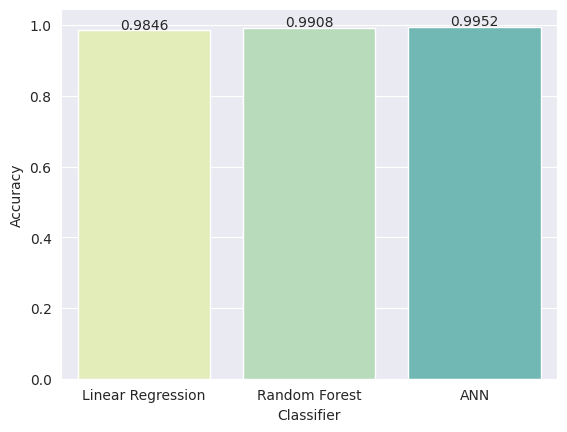

In [82]:
# Comparision of the performance of models based on R2 Score
Name = ['Linear Regression', 'Random Forest', 'ANN']
Score = [r2scorehyptest, r2score_hyp_test, r2_test_ann2]

# Plotting bar graphs for comparision
axis = sns.barplot(x = Name , y = Score, data = data)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

# Displaying Bar charts
plt.show()

The R2 Score has negligible differences among models. To find the best model let's plot bar chart for MSE Comparision also.
To make Comparision of the MSE of models, let's compare the MSE of models after hyper parameter optimization by plotting the bar graph:

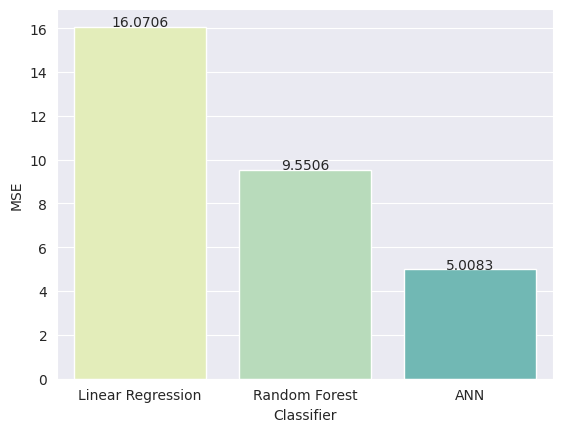

In [83]:
# Comparision of the performance of models based on MSE
MSE = [msehyptest, mse_hyp_test, mse_neural_test_ann2]

# Plotting bar graphs for comparision
axis = sns.barplot(x = Name , y = MSE, data = data)
axis.set(xlabel='Classifier', ylabel='MSE')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

# Displaying Bar charts
plt.show()

From the above graphs, it can be seen:
* ANN has highest R2 score and lowest MSE among all models.
* Although, R2 score is significantly similar for all models; the difference in other metric MSE points out that ANN is better than other two.
* The high R2 score implies that these models predict the energy consumption precisely and accurately. Also, there is no overfitting of data as explained above in modelling section. It can imply that right set of features are selected in feature extraction and steps of data preparation and data pre processing have prepared the data well for modelling.

It can be concluded that ANN performs better than other models and predict the energy consumption precisely and accurately.

#### Graphs/Plots for Best Performing Model - ANN 

#### Plot 1: Feature importance of the model

In [119]:
# Printing columns of the dataset
X.columns
colors = ["Green", "Blue", "Red"]
sns.set_palette(colors)

The features with their index are: <br>
0 - Lagging_Current_Reactive.Power_kVarh <br>
1 - CO2(tCO2) <br>
2 - Lagging_Current_Power_Factor <br>
3 - WeekStatus <br>
4 - Load_Type <br>

Citation: “Feature Importance Chart in Neural Network Using Keras in Python.” Stack Overflow, stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python.

In [128]:
# extracting the weights of the first layer
weights = model_ann2.layers[0].get_weights()[0]

# calculating the importance of each feature based on its weight
importance = np.sum(np.abs(weights), axis=1)


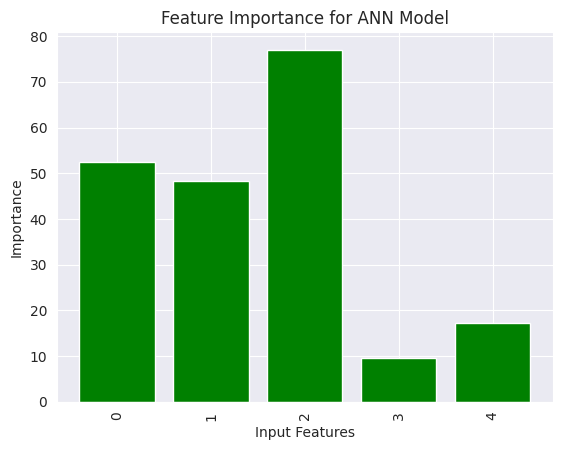

In [129]:
# ploting the feature importance graph
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), rotation=90)
plt.xlabel('Input Features')
plt.ylabel('Importance')
plt.title('Feature Importance for ANN Model')
plt.show()

In the model building Feature 2 - Lagging_Current_Power_Factor has highest importance followed by Feature 0 (Lagging_Current_Reactive.Power_kVarh) and Feature 1 (CO2(tCO2)). Importance of Feature 4 (WeekStatus) is lower than importance of Feature 0, 1, 2 and Feature 3 has least importance

#### Plot 2 - Plotting True vs Predicted value for the model

219/219 [==============================] - 0s 2ms/step


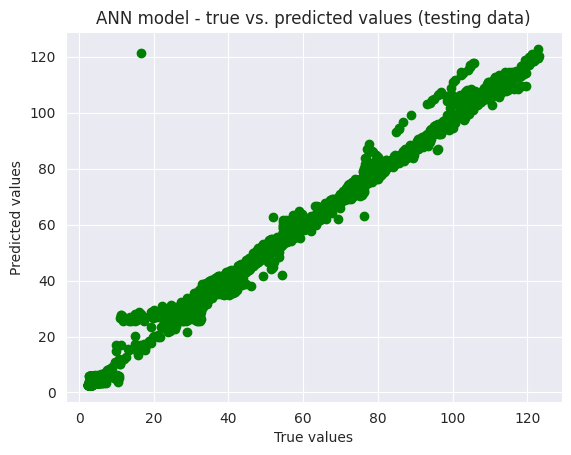

In [121]:
y_true = y_test
y_pred = model_ann2.predict(x_test).flatten()
plt.scatter(y_true, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('ANN model - true vs. predicted values (testing data)')
plt.show()

The scatter plot of true vs. predicted values reveals a clear linear relationship between the two, showing that the model predicts the target variable accurately. The points are near to the diagonal line, indicating that the anticipated values are accurate. 

#### Plot 3: Residual Plot 

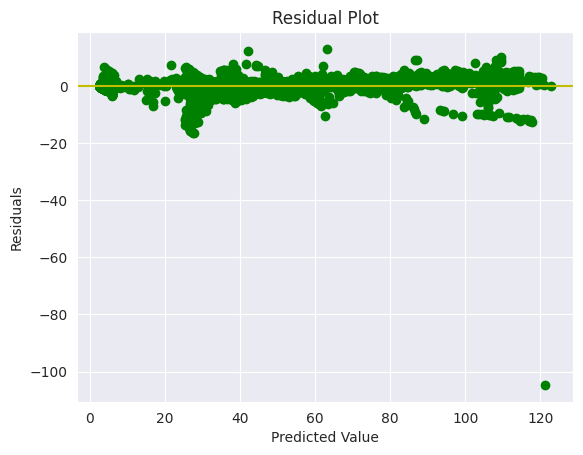

In [127]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='y', linestyle='-')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The scatter plot of predicted values vs residuals does not reveal any discernible pattern, and the residual values are randomly distributed around the horizontal line at y=0. There is no evident funnel shape or heteroscedasticity in the scatter plot, showing that the model performs consistently across the range of anticipated values.

#### Plot 4: Histogram showing distribution plot of residuals

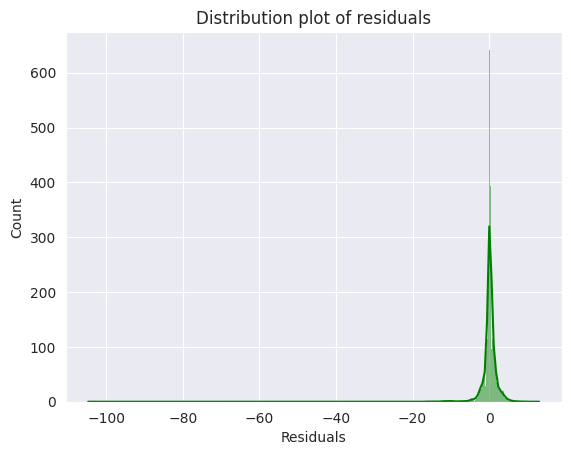

In [126]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution plot of residuals')
plt.show()

The residual plot shows it is good to use ANN model as the distribution plot of residuals have a bell-shaped curve, indicating that the residuals are normally distributed around zero. There are no obvious skewness or outliers in the plot.